# Table of Contents
- [Imports](#imp)
- [cleaning](#clean)
- [visualization](#vis)
    - [mapping](#map)
        - [animation](#anim)
    - [time series](#time)
        - [time series](#1)
        - [winter t-max change](#2)
        - [winter t-min change](#3)
- [conclusion](#conc)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
# to ignore annoying python warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the iris dataset
data_path = "../data/Iris.csv"
df = pd.read_csv(data_path,index_col="Id")
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [73]:
list(df.columns)[:-1]

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [9]:
sns.set();

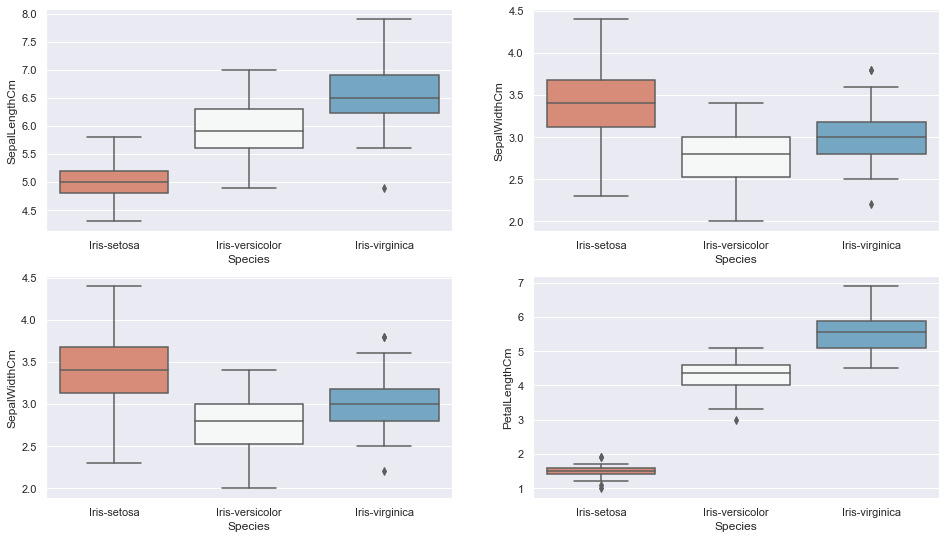

In [78]:
_, ax =plt.subplots(2,2, figsize=(16,9))
cols = list(df.columns)[:-2]
x_ = list(df.columns)[-1]
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(ax = ax[i,j],x=x_, y =cols[j+i], data=df, palette='RdBu' );

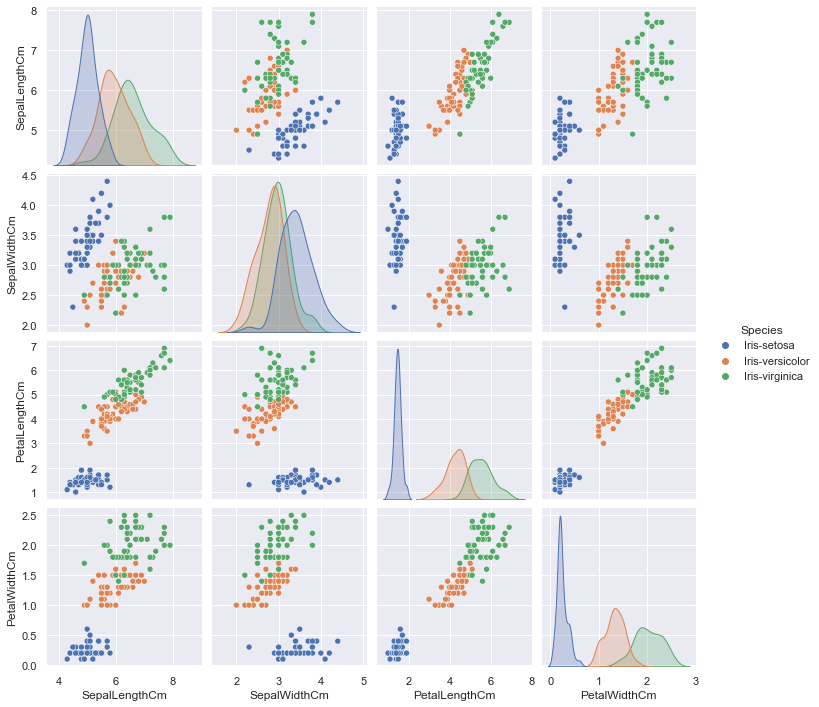

In [22]:
sns.pairplot(df, hue="Species");

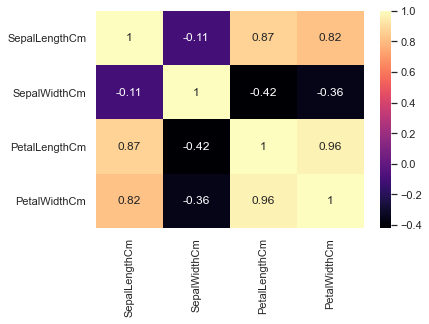

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='magma');

In [24]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [55]:
cmap = "magma" # plasma
palette='RdBu'

In [56]:
setosa_W = df[df.Species=='Iris-setosa'].SepalWidthCm
setosa_L = df[df.Species=='Iris-setosa'].SepalLengthCm

(<Figure size 1152x648 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

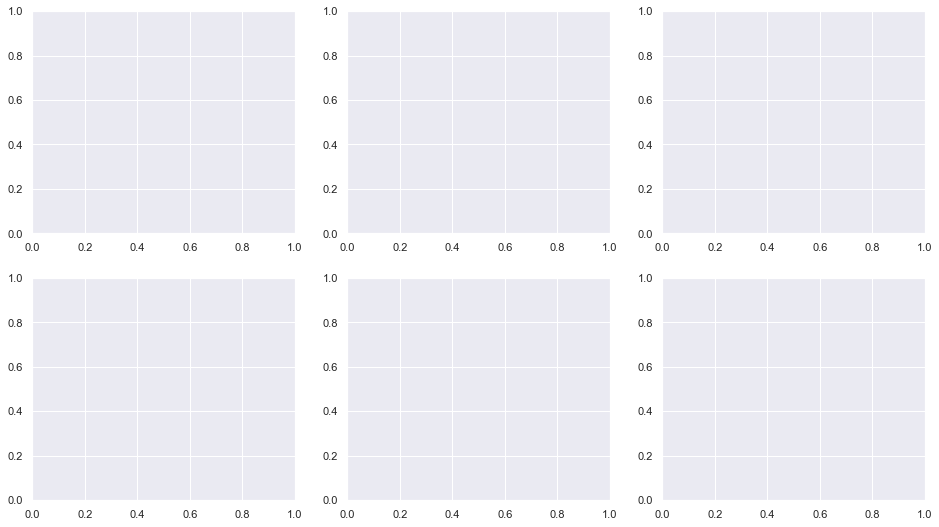

In [94]:
plt.subplots(2,3, figsize=(16,9))

In [104]:
set([cols[0]])

{'SepalLengthCm'}

In [102]:
set(cols).difference(set(cols[0]))

{'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'}

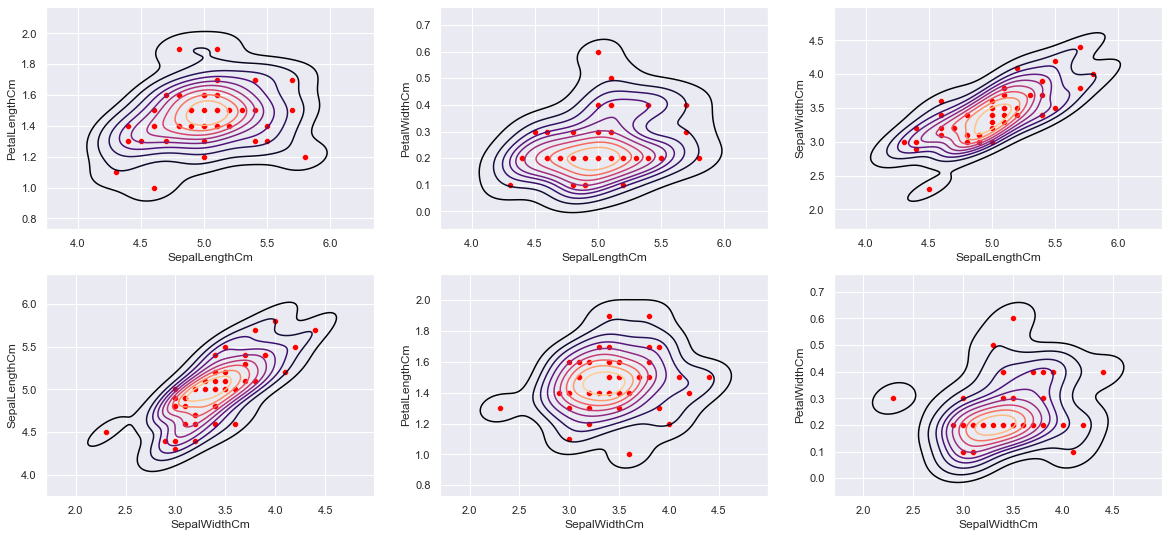

In [116]:
_, ax = plt.subplots(2,3, figsize=(20,9))
cols = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in range(0,2):
    x = df[df.Species=='Iris-setosa'][cols[i]]
    for j,val in enumerate(set(cols).difference(set([cols[i]]))):
        y = df[df.Species=='Iris-setosa'][val]
        sns.kdeplot( x,y,ax = ax[i,j], cmap = cmap,shade = False,shade_lowest=False);
        sns.scatterplot(data=df, x=x, y=y,ax = ax[i,j], color = "red")

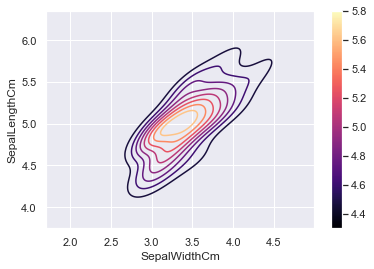

In [59]:
ax = sns.kdeplot(setosa_W,setosa_L, cmap = cmap,shade = False,shade_lowest=True);

# ADD: colorbar
norm = plt.Normalize(setosa_L.min(), setosa_L.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]);
ax.figure.colorbar(sm);